## Non-linear Programming Problems
- The main types of NLP problems are:
    - Unconstrained Optimization- Optimizing a non-linear objective function that has no constraints
    - Linearly constrained optimization- Where a non-linear objective function has linear constraints
    - Quadratic programming- Has linear constraints and non-linear quadratic objective function $f(x)$
    - Convex programming
        - Concave objective function
        - Convex constraints
    - Non-convex programming- Includes the problems that do not satisfy the requirements of convex programming.

In [12]:
import numpy as np
from scipy.optimize import minimize_scalar, minimize

### Single-Variable Function Optimization
- In other words, we are optimizing a function with one variable
- A mathematical function that accepts one number and results in one output is a **scalar function**, which constrasts with multivariate functions that acceot multiple numbers and result in multiple outputs.
- Consider a *quartic polynomial*  $y= 3x^4 - 2x + 1$. The objective is to optimize (maximixe or minimize) this function

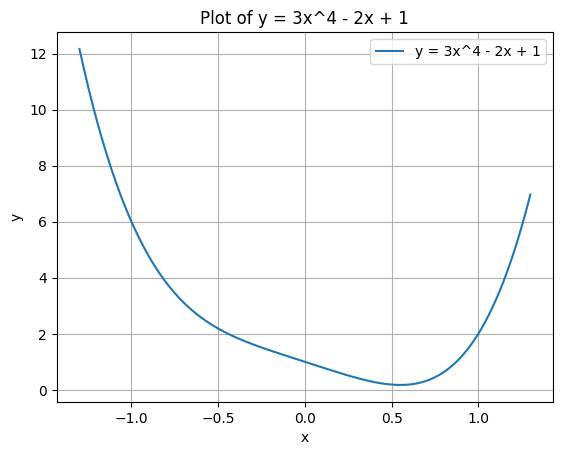

In [48]:
import matplotlib.pyplot as plt

def y(x):
    return 3 * x**4 - 2 * x + 1

# Generate x & yvalues
x_values = np.linspace(-1.3, 1.3, 100)  
 # np.linspace() generates an array of evenly spaced numbers over a defined interval
y_values = y(x_values)

# Plot the function
plt.plot(x_values, y_values, label='y = 3x^4 - 2x + 1')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = 3x^4 - 2x + 1')

plt.grid(True)
plt.legend()

As the objective function is convex, we can only minimize it.

In [ ]:
## Objective function
def single_objective(x):
    return 3*x**4 -2*x + 1

## Applying minimization
single_res= minimize_scalar(single_objective)
 # We use minimize_scalar since we are minimizing a single-variable function

## Results:
print(single_res)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 0.17451818777634331
       x: 0.5503212087491959
     nit: 12
    nfev: 15


- `single_objective(x)` takes the input x (a number) and applies the necessary mathematical operations to it to return a *single* result.
- `minimize_scalar()` funds the minimum of this function. It has only one required input, the objective function definition.
- The output of `mminimize_scalar()` shows:
    - The minimum value of the objective function is 0.1745
    - The corresponding x value is 0.5503
    - `nit= 12` (**n**number of **it**erations) meaning the optimizer took 12 iterations to converge to the solution
    - `nfev= 15` (**n**umber of **f**unctions **ev**aluations)
    means the objective function was evaluated 15 times. Each function evaluation means the optimizer computed `objective_function(x)` to check whether the function value was minimized

- Note that some functions may have *several minima*. In these cases `minimize_scaler()` is not guaranteed to find the global minimum of the function. In such a case we can change the `method` of minimization by choosing a more appropriate solver:
    - **brent**- An implementation of Brent's method. This is the default.
    - **golden**- An implementation of Golden Section Search (The documentation notes that Brent's method is better)
    - **bounded**- A bounded implementation of Brent's algorithm. Useful to limit the search region when the minimum is known to be in a certain range
- When a method is either `brent` or `golden`, `minimize_scaler()` can take another argument `bracket`, which is a sequence of two or three elements that provide an initial guess for the bounds of the region with the minimum. However, it's not a guarantee that the minimum will be found in this range.
- `minimize_scalar()` can also take an optional argument `bounds`, which is a sequence of two elements that strictly bounds the search region for the minimum.

Consider function: $f(x)= x^4 - x^2$

Text(0.5, 1.0, 'f(x) = x^4 - x^2')

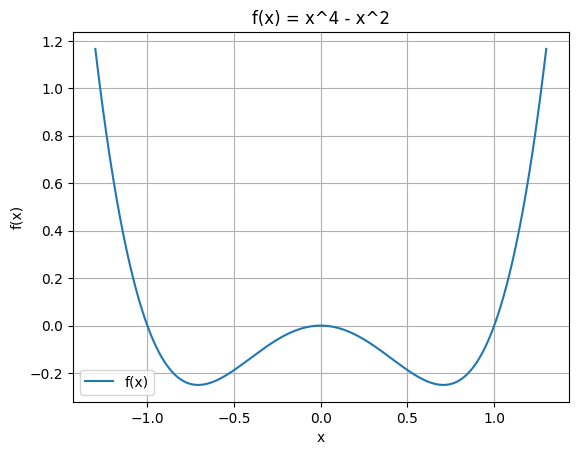

In [76]:
## Function
def f(x):
    return x**4 - x**2

values_x= np.linspace(-1.3, 1.3, 1000)
values_fx= f(values_x)

## Plot
plt.plot(values_x, values_fx, label= 'f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()

plt.title('f(x) = x^4 - x^2')


In [30]:
## Minimizing the above function
def objective(x):
    return x**4 - x**2

result1= minimize_scalar(objective)
print('Result 1')
print(result1)

Result 1
 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.24999999999999994
       x: 0.7071067853059209
     nit: 11
    nfev: 14


Minimmum of the function is -0.25 with x= 0.707106 which is very close to $x= \frac{1}{\sqrt{2}}$ if the problem was solved analytically.

In [ ]:
## Bracket argument
result2= minimize_scalar(objective, bracket=(-1,0))
print('Result 2')
print(result2)

print()

## Bounds argument
result3= minimize_scalar(objective, bounds=(-1,0))
print('Result 3')
print(result3)

Result 2
 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.24999999999999997
       x: 0.7071067809244586
     nit: 13
    nfev: 16

Result 3
 message: Solution found.
 success: True
  status: 0
     fun: -0.24999999999998732
       x: -0.707106701474177
     nit: 10
    nfev: 10


In [ ]:
import math
1/math.sqrt(2)

0.7071067811865475

The `bracket` argument simply provides the intial guess for the bounds of x as done is results2 above $(-1,0)$. However the Brent method will still return the minimum at 0.25 and $x= \frac{1}{\sqrt{2}}$. The `bounds` argument strictly bounds the search region between $(-1,0)$ thus returning a minimum within that bound.

---------------

Consider the below objective function:
$$Max \space \space R= 12x - 3x^4 - 2x^6$$
This is a concave function that can only be maximized.

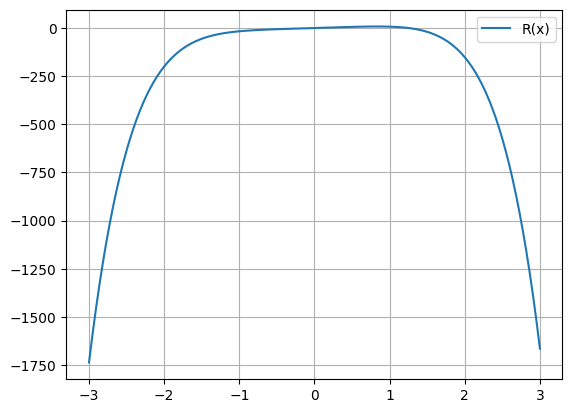

In [89]:
def R(x):
    return 12*x - 3*x**4 - 2*x**6

Xvalues= np.linspace(-3, 3, 400)
Rxvalues= R(Xvalues)

plt.plot(Xvalues, Rxvalues, label='R(x)')
plt.legend()
plt.grid()


In [112]:
## Objective function
# Recall the R(x) function above
def neg_R(x):
    return -R(x)
 # Convert the concave function to a convex function since SciPy only performs minimization
 # and its not possible to minimize a concave function

result_max = minimize_scalar(neg_R)
print(result_max)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -7.88394552412957
       x: 0.8376197748171537
     nit: 12
    nfev: 15


The maximum of the function $R(x)$ is 7.8839 (positive) with $x= 0.8376$

### Multivariable NLP Optimization
$$Max \space \space f(x1,x2)= 2x_1x_2 + 2x_2 - x_1^2 -2x_2^2$$
This is a concave function that can only be maximized.

Text(0.5, 0.92, '3D Plot of Objective Function')

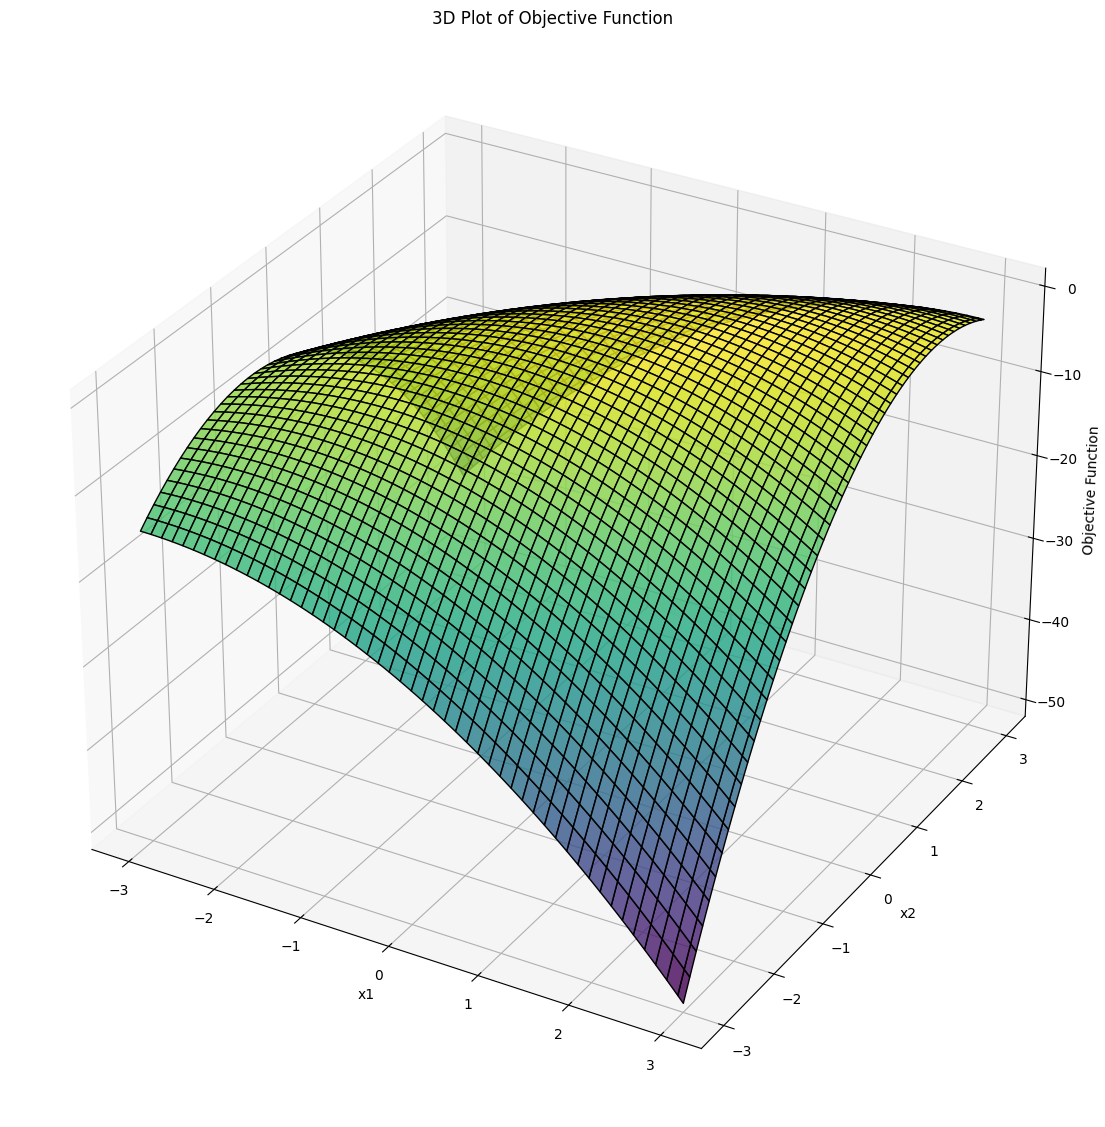

In [ ]:
## Visualizing the concave objective function
from mpl_toolkits.mplot3d import Axes3D

def objective_function(x1, x2):
    return 2*x1*x2 + 2*x2 - x1**2 - 2*x2**2

x1 = np.linspace(-3, 3, 100) 
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)  # Create grid for surface plot

Z = objective_function(X1, X2)

# The plot
fig = plt.figure(figsize=(14, 16))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X1, X2, Z, cmap="viridis", edgecolor='k', alpha=0.8)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Objective Function")
ax.set_title("3D Plot of Objective Function")


In [ ]:
## Objective function
 # The objective function is an array of two elements 
 # objective_function([x1, x2]) will produce a result
def objective_function(x):
    x1= x[0]
    x2= x[1]
    return -(2*x1*x2 + 2*x2 - x1**2 - 2*x2**2)
 # Optimization algorithms in SciPy expect the objective function to take a single input
 # which is why we have tp define objective_function() in this way
 # Also, the function must return a scalar value (single numeric value) based on the input variables

result= minimize(objective_function, 
                 x0= np.array([0, 0])) # The initial guess for the solution

print(result)


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.999999999999998
        x: [ 1.000e+00  1.000e+00]
      nit: 2
      jac: [ 0.000e+00 -5.960e-08]
 hess_inv: [[ 1.000e+00  5.000e-01]
            [ 5.000e-01  5.000e-01]]
     nfev: 12
     njev: 4


- Optimization algorithms in SciPy expect the objective function to take a single input which is why we have to define `objective_function()` in this way. Also, the optimization algorithm minimizes (or maximizes) a scalar value. In this case, the function returns a single numeric value based on the input variables.

- `njev` represents the **n**umber of **j**acobian **e**valuations and appears during multi-variate NLP optimization. The Jacobian is a vector of first order partial derivatives of the objective function with respect to each of the decision variables that helps determine the direction of the steepest ascent/descent (descent in the case of minimization).
- `njev= 15` means that the Jacobian (gradient) of the objective function is evaluated 15 times.
- A higher `njev` value typically means more iterations were required, which could indicate a more complex optimization problem or slower convergence.

Maximum of the function is 1 (positive) and optmial $(x1, x2)$ values are $(1,1)$ respectively.

*************

Consider the below NLP. This time with constraints.
![NLPProblem](NLPProblem.png)

In [ ]:
## Objective Function
def obj(x):
    x1= x[0]
    x2= x[1]
    return x1**3 + x1*x2

## Constraints
# Equality constraint
def eq_con(x):
    x1= x[0]
    x2= x[1]
    return x1**3 + x1*x2 - 100 # Taking the value (100) to the other side

# Inequality constraints
def ineq_con(x):
    x1= x[0]
    x2= x[1]
    return x1**3 + x1*x2 - 50

constraint1= {'type': 'eq', 'fun': eq_con}
constraint2= {'type': 'ineq', 'fun': ineq_con}
constraint= [constraint1, constraint2]

## Bounds
x1_bounds= (-100, 100)
x2_bounds= (-100, 100)
bounds= [x1_bounds, x2_bounds]

## Initial guess
x0= [1, 1]

## Optimization
result= minimize(obj, x0, method= 'SLSQP', 
                 bounds= bounds, 
                 constraints= constraint)


print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 100.00000034866228
       x: [ 4.520e+00  1.694e+00]
     nit: 6
     jac: [ 6.298e+01  4.520e+00]
    nfev: 20
    njev: 6


********

Consider the below NLP with linear constraints
$$Max \space \space Z= -x_1^2 - x_2^2 - x_3^2 + 4x_1 + 6x_2$$
s.t.
$$x_1 + x_2 \leq 2$$
$$2x_1 + 3x_2 \leq 12$$ 
$$x_1, x_2 \geq 0$$

In [120]:
## Objective function
def obj(x):
    x1= x[0]
    x2= x[1]
    x3= x[2]
    return -(-x1**2 - x2**2 - x3**2 + 4*x1 + 6*x2)

## Constraints
def cons1(x):
    x1= x[0]
    x2= x[1]
    x3= x[2]
    return x1 + x2 -1

def cons2(x):
    x1= x[0]
    x2= x[1]
    x3= x[2]
    return 2*x1 + 3*x2 - 12

cons1= {'type': 'ineq', 'fun': cons1}
cons2= {'type': 'ineq', 'fun': cons2}
cons= [cons1, cons2]

## Bounds
bounds= [(0, None), (0, None), (0, None)]

## Initial Guess
x0= [0, 0, 0]

## Optimization
solution= minimize(obj, x0, method= 'SLSQP', 
                   constraints= cons, bounds= bounds)

print(solution)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -12.999999999999998
       x: [ 2.000e+00  3.000e+00  1.654e-24]
     nit: 2
     jac: [ 0.000e+00  0.000e+00  0.000e+00]
    nfev: 9
    njev: 2


Maximum of the function is 13 with $(x_1, x_2, x_3)= (2, 3, 0.00000 \dots 1654)$

An objective Function with non-convex, non-concave constraints. `cvxpy` is unable to solve this problem for that reason/ 
$$Max \space \space R = 2x_1 + 3x_2$$
s.t.
$$x1x2 \leq 8$$
$$x_1^2 + x_2^2 \leq 20$$
$$x_1, x_2 \geq 0$$